In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust

In [149]:
datosFase= pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto74/paso_a_paso.csv")
datosFase

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5


In [150]:
#cambio de formato
datosFase['id_comuna'] = datosFase['codigo_comuna'].astype(float)
datosFase

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,id_comuna
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,15101.0
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,15101.0
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,15102.0
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,15202.0
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,15201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12101.0
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12103.0
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12104.0
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12303.0


In [151]:
datapoblacion= pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
datapoblacion

,Poblacion,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa
0,247552.0,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605
1,247552.0,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399
2,247552.0,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061
3,247552.0,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671
4,247552.0,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571
...,...,...,...,...,...,...,...,...,...,...
50676,NaN,-,2020/04/17,NaN,NaN,NaN,NaN,NaN,NaN,-
50677,NaN,-,2020/04/10,NaN,NaN,NaN,NaN,NaN,NaN,-
50678,NaN,-,2020/06/12,NaN,NaN,NaN,NaN,NaN,NaN,-
50679,NaN,71.0,2020/08/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
datapoblacion['Date'] = pd.to_datetime(datapoblacion['Fecha'])

In [153]:
#Elimnando datos nulos
datapoblacion2 =datapoblacion.dropna()
datapoblacion2 

,Poblacion,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa,Date
0,247552.0,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605,2020-08-24
1,247552.0,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399,2021-05-21
2,247552.0,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061,2021-01-01
3,247552.0,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671,2021-06-11
4,247552.0,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571,2020-12-14
...,...,...,...,...,...,...,...,...,...,...,...
50535,1021.0,2.0,2020/10/30,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,195.88638589618023,2020-10-30
50536,1021.0,0.0,2020/04/17,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-04-17
50537,1021.0,0.0,2020/04/10,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-04-10
50538,1021.0,0.0,2020/06/12,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-06-12


In [154]:
DataTop = pd.merge(left=datosFase , right = datapoblacion2 , how='left' , left_on = 'id_comuna', right_on='Comuna ID')
DataTop

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa,Date
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605,2020-08-24
1,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399,2021-05-21
2,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061,2021-01-01
3,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671,2021-06-11
4,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571,2020-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,2.0,2020/10/30,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,195.88638589618023,2020-10-30
53480,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,0.0,2020/04/17,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-04-17
53481,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,0.0,2020/04/10,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-04-10
53482,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,0.0,2020/06/12,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-06-12


In [155]:
Combinadollimpio = DataTop.drop(['Casos Confirmados', 'Fecha', 'Region ID',"Provincia ID","Provincia","Comuna ID","Comuna","Tasa","Date","Region"], axis=1)
Combinadollimpio

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,id_comuna,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
1,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
2,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
3,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
4,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0
53480,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0
53481,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0
53482,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0


In [156]:
##Limpiado de Duplicados
NewData = Combinadollimpio.drop_duplicates()
NewData

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,id_comuna,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
140,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,15101.0,247552.0
280,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15102.0,1233.0
420,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,15202.0,810.0
560,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15201.0,2515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52784,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12101.0,141984.0
52924,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12103.0,211.0
53064,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12104.0,681.0
53204,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12303.0,282.0


In [157]:
NewData1= pd.melt(NewData, id_vars = ['codigo_region','region_residencia','codigo_comuna','comuna_residencia','zona','id_comuna','Poblacion'], var_name = 'Fecha', value_name = 'Fase')
NewData1

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase
0,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,15102.0,1233.0,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,15202.0,810.0,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,15201.0,2515.0,2020-07-28,3
...,...,...,...,...,...,...,...,...,...
168291,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2021-10-06,5
168292,12,Magallanes,12103,Río Verde,Total,12103.0,211.0,2021-10-06,5
168293,12,Magallanes,12104,San Gregorio,Total,12104.0,681.0,2021-10-06,5
168294,12,Magallanes,12303,Timaukel,Total,12303.0,282.0,2021-10-06,5


In [158]:
#Cambio de formato Fecha
NewData1['fecha'] = pd.to_datetime(NewData1['Fecha'])
NewData1

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
0,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2020-07-28,3,2020-07-28
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1,2020-07-28
2,15,Arica y Parinacota,15102,Camarones,Total,15102.0,1233.0,2020-07-28,3,2020-07-28
3,15,Arica y Parinacota,15202,General Lagos,Total,15202.0,810.0,2020-07-28,3,2020-07-28
4,15,Arica y Parinacota,15201,Putre,Total,15201.0,2515.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168291,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2021-10-06,5,2021-10-06
168292,12,Magallanes,12103,Río Verde,Total,12103.0,211.0,2021-10-06,5,2021-10-06
168293,12,Magallanes,12104,San Gregorio,Total,12104.0,681.0,2021-10-06,5,2021-10-06
168294,12,Magallanes,12303,Timaukel,Total,12303.0,282.0,2021-10-06,5,2021-10-06


In [159]:
Arica = NewData1[(NewData1.codigo_region==15) & (NewData1.Fase==1)]
Arica

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1,2020-07-28
387,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-29,1,2020-07-29
773,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-30,1,2020-07-30
1159,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-31,1,2020-07-31
1545,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-08-01,1,2020-08-01
...,...,...,...,...,...,...,...,...,...,...
123907,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2021-06-14,1,2021-06-14
124292,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2021-06-15,1,2021-06-15
124293,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2021-06-15,1,2021-06-15
124678,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2021-06-16,1,2021-06-16


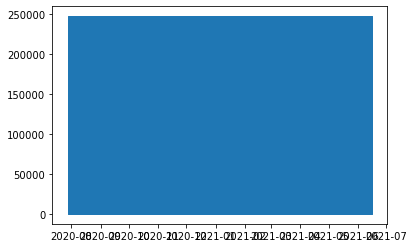

In [160]:
fig, ag = plt.subplots()
ag.fill_between(Arica["fecha"], Arica["Poblacion"], color = 'tab:blue')
plt.show()

In [161]:
Tarapaca = NewData1[(NewData1.codigo_region==1) & (NewData1.Fase==1)]
Tarapaca

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
5,1,Tarapacá,1107,Alto Hospicio,Total,1107.0,129999.0,2020-07-28,1,2020-07-28
9,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2020-07-28,1,2020-07-28
12,1,Tarapacá,1401,Pozo Almonte,Urbana,1401.0,17395.0,2020-07-28,1,2020-07-28
391,1,Tarapacá,1107,Alto Hospicio,Total,1107.0,129999.0,2020-07-29,1,2020-07-29
395,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2020-07-29,1,2020-07-29
...,...,...,...,...,...,...,...,...,...,...
111949,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2021-05-14,1,2021-05-14
112331,1,Tarapacá,1107,Alto Hospicio,Total,1107.0,129999.0,2021-05-15,1,2021-05-15
112335,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2021-05-15,1,2021-05-15
112717,1,Tarapacá,1107,Alto Hospicio,Total,1107.0,129999.0,2021-05-16,1,2021-05-16


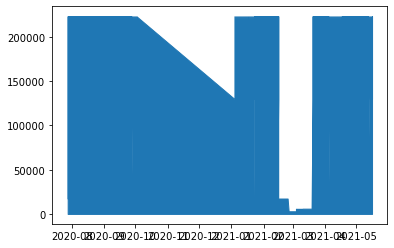

In [162]:
fig, ag = plt.subplots()
ag.fill_between(Tarapaca["fecha"], Tarapaca["Poblacion"], color = 'tab:blue')
plt.show()

In [163]:
Antofagasta = NewData1[(NewData1.codigo_region==2) & (NewData1.Fase==1)]
Antofagasta

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
14,2,Antofagasta,2101,Antofagasta,Urbana,2101.0,425725.0,2020-07-28,1,2020-07-28
15,2,Antofagasta,2201,Calama,Total,2201.0,190336.0,2020-07-28,1,2020-07-28
18,2,Antofagasta,2102,Mejillones,Urbana,2102.0,14776.0,2020-07-28,1,2020-07-28
24,2,Antofagasta,2301,Tocopilla,Urbana,2301.0,28079.0,2020-07-28,1,2020-07-28
400,2,Antofagasta,2101,Antofagasta,Urbana,2101.0,425725.0,2020-07-29,1,2020-07-29
...,...,...,...,...,...,...,...,...,...,...
108481,2,Antofagasta,2201,Calama,Total,2201.0,190336.0,2021-05-05,1,2021-05-05
108867,2,Antofagasta,2201,Calama,Total,2201.0,190336.0,2021-05-06,1,2021-05-06
109253,2,Antofagasta,2201,Calama,Total,2201.0,190336.0,2021-05-07,1,2021-05-07
109639,2,Antofagasta,2201,Calama,Total,2201.0,190336.0,2021-05-08,1,2021-05-08


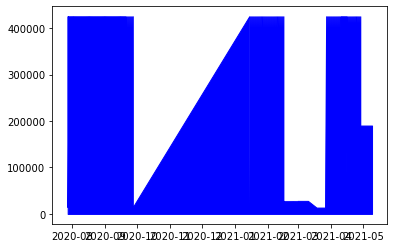

In [164]:
fig, ag = plt.subplots()
ag.fill_between(Antofagasta["fecha"], Antofagasta["Poblacion"], color = 'blue')
plt.show()

In [165]:
Atacama = NewData1[(NewData1.codigo_region==3) & (NewData1.Fase==1)]
Atacama

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
28,3,Atacama,3101,Copiapó,Total,3101.0,171766.0,2020-07-28,1,2020-07-28
414,3,Atacama,3101,Copiapó,Total,3101.0,171766.0,2020-07-29,1,2020-07-29
800,3,Atacama,3101,Copiapó,Total,3101.0,171766.0,2020-07-30,1,2020-07-30
1186,3,Atacama,3101,Copiapó,Total,3101.0,171766.0,2020-07-31,1,2020-07-31
1572,3,Atacama,3101,Copiapó,Total,3101.0,171766.0,2020-08-01,1,2020-08-01
...,...,...,...,...,...,...,...,...,...,...
140150,3,Atacama,3103,Tierra Amarilla,Total,3103.0,14312.0,2021-07-26,1,2021-07-26
140536,3,Atacama,3103,Tierra Amarilla,Total,3103.0,14312.0,2021-07-27,1,2021-07-27
140922,3,Atacama,3103,Tierra Amarilla,Total,3103.0,14312.0,2021-07-28,1,2021-07-28
141308,3,Atacama,3103,Tierra Amarilla,Total,3103.0,14312.0,2021-07-29,1,2021-07-29


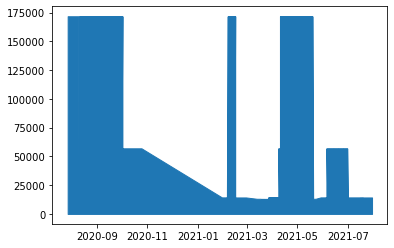

In [166]:
fig, ag = plt.subplots()
ag.fill_between(Atacama["fecha"], Atacama["Poblacion"], color = 'tab:blue')
plt.show()

In [167]:
Coquimbo = NewData1[(NewData1.codigo_region==4) & (NewData1.Fase==1)]
Coquimbo

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
423,4,Coquimbo,4102,Coquimbo,Total,4102.0,256735.0,2020-07-29,1,2020-07-29
426,4,Coquimbo,4101,La Serena,Total,4101.0,249656.0,2020-07-29,1,2020-07-29
809,4,Coquimbo,4102,Coquimbo,Total,4102.0,256735.0,2020-07-30,1,2020-07-30
812,4,Coquimbo,4101,La Serena,Total,4101.0,249656.0,2020-07-30,1,2020-07-30
1195,4,Coquimbo,4102,Coquimbo,Total,4102.0,256735.0,2020-07-31,1,2020-07-31
...,...,...,...,...,...,...,...,...,...,...
135534,4,Coquimbo,4106,Vicuña,Total,4106.0,29741.0,2021-07-14,1,2021-07-14
135920,4,Coquimbo,4106,Vicuña,Total,4106.0,29741.0,2021-07-15,1,2021-07-15
136306,4,Coquimbo,4106,Vicuña,Total,4106.0,29741.0,2021-07-16,1,2021-07-16
136692,4,Coquimbo,4106,Vicuña,Total,4106.0,29741.0,2021-07-17,1,2021-07-17


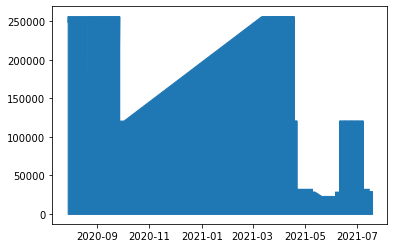

In [168]:
fig, ag = plt.subplots()
ag.fill_between(Coquimbo["fecha"], Coquimbo["Poblacion"], color = 'tab:blue')
plt.show()

In [169]:
Valparaíso = NewData1[(NewData1.codigo_region==5) & (NewData1.Fase==1)]
Valparaíso

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
51,5,Valparaíso,5502,La Calera,Total,5502.0,53591.0,2020-07-28,1,2020-07-28
62,5,Valparaíso,5504,La Cruz,Total,5504.0,25321.0,2020-07-28,1,2020-07-28
66,5,Valparaíso,5301,Los Andes,Total,5301.0,68093.0,2020-07-28,1,2020-07-28
74,5,Valparaíso,5501,Quillota,Total,5501.0,97572.0,2020-07-28,1,2020-07-28
83,5,Valparaíso,5101,Valparaiso,Total,5101.0,315732.0,2020-07-28,1,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
137481,5,Valparaíso,5703,Llay-Llay,Total,5703.0,26533.0,2021-07-19,1,2021-07-19
137867,5,Valparaíso,5703,Llay-Llay,Total,5703.0,26533.0,2021-07-20,1,2021-07-20
138253,5,Valparaíso,5703,Llay-Llay,Total,5703.0,26533.0,2021-07-21,1,2021-07-21
138639,5,Valparaíso,5703,Llay-Llay,Total,5703.0,26533.0,2021-07-22,1,2021-07-22


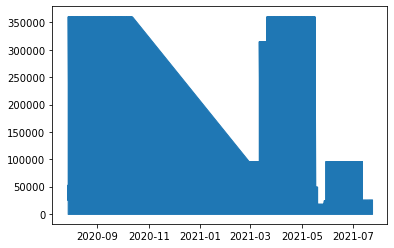

In [170]:
fig, ag = plt.subplots()
ag.fill_between(Valparaíso["fecha"], Valparaíso["Poblacion"], color = 'tab:blue')
plt.show()

In [171]:
OHiggins = NewData1[(NewData1.codigo_region==6) & (NewData1.Fase==1)]
OHiggins

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
148,6,O’Higgins,6106,Graneros,Total,6106.0,36504.0,2020-07-28,1,2020-07-28
153,6,O’Higgins,6108,Machalí,Total,6108.0,59913.0,2020-07-28,1,2020-07-28
169,6,O’Higgins,6101,Rancagua,Total,6101.0,265211.0,2020-07-28,1,2020-07-28
170,6,O’Higgins,6115,Rengo,Total,6115.0,63710.0,2020-07-28,1,2020-07-28
534,6,O’Higgins,6106,Graneros,Total,6106.0,36504.0,2020-07-29,1,2020-07-29
...,...,...,...,...,...,...,...,...,...,...
132170,6,O’Higgins,6205,Navidad,Total,6205.0,6904.0,2021-07-05,1,2021-07-05
132540,6,O’Higgins,6302,Chépica,Total,6302.0,15925.0,2021-07-06,1,2021-07-06
132556,6,O’Higgins,6205,Navidad,Total,6205.0,6904.0,2021-07-06,1,2021-07-06
132926,6,O’Higgins,6302,Chépica,Total,6302.0,15925.0,2021-07-07,1,2021-07-07


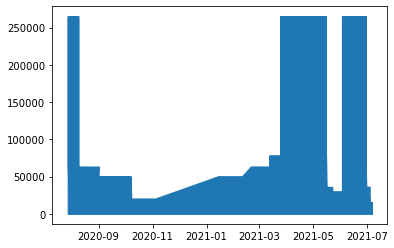

In [172]:
fig, ag = plt.subplots()
ag.fill_between(OHiggins["fecha"], OHiggins["Poblacion"], color = 'tab:blue')
plt.show()

In [173]:
Maule = NewData1[(NewData1.codigo_region==7) & (NewData1.Fase==1)]
Maule

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
181,7,Maule,7301,Curicó,Urbana,7301.0,163626.0,2020-07-28,1,2020-07-28
567,7,Maule,7301,Curicó,Urbana,7301.0,163626.0,2020-07-29,1,2020-07-29
953,7,Maule,7301,Curicó,Urbana,7301.0,163626.0,2020-07-30,1,2020-07-30
1339,7,Maule,7301,Curicó,Urbana,7301.0,163626.0,2020-07-31,1,2020-07-31
1725,7,Maule,7301,Curicó,Urbana,7301.0,163626.0,2020-08-01,1,2020-08-01
...,...,...,...,...,...,...,...,...,...,...
137599,7,Maule,7302,Hualañé,Total,7302.0,10222.0,2021-07-19,1,2021-07-19
137985,7,Maule,7302,Hualañé,Total,7302.0,10222.0,2021-07-20,1,2021-07-20
138371,7,Maule,7302,Hualañé,Total,7302.0,10222.0,2021-07-21,1,2021-07-21
138757,7,Maule,7302,Hualañé,Total,7302.0,10222.0,2021-07-22,1,2021-07-22


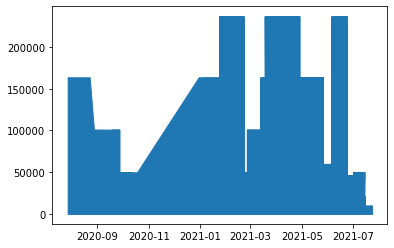

In [174]:
fig, ag = plt.subplots()
ag.fill_between(Maule["fecha"], Maule["Poblacion"], color = 'tab:blue')
plt.show()

In [175]:
Biobío = NewData1[(NewData1.codigo_region==8) & (NewData1.Fase==1)]
Biobío

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
9519,8,Biobío,8107,Penco,Total,8107.0,49865.0,2020-08-21,1,2020-08-21
9528,8,Biobío,8111,Tomé,Total,8111.0,58729.0,2020-08-21,1,2020-08-21
9905,8,Biobío,8107,Penco,Total,8107.0,49865.0,2020-08-22,1,2020-08-22
9914,8,Biobío,8111,Tomé,Total,8111.0,58729.0,2020-08-22,1,2020-08-22
10291,8,Biobío,8107,Penco,Total,8107.0,49865.0,2020-08-23,1,2020-08-23
...,...,...,...,...,...,...,...,...,...,...
140381,8,Biobío,8207,Tirúa,Total,8207.0,11019.0,2021-07-26,1,2021-07-26
140767,8,Biobío,8207,Tirúa,Total,8207.0,11019.0,2021-07-27,1,2021-07-27
141153,8,Biobío,8207,Tirúa,Total,8207.0,11019.0,2021-07-28,1,2021-07-28
141539,8,Biobío,8207,Tirúa,Total,8207.0,11019.0,2021-07-29,1,2021-07-29


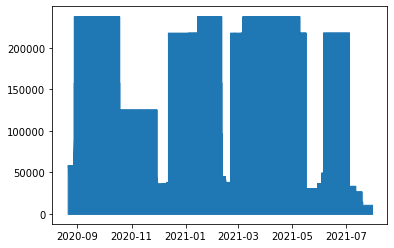

In [176]:
fig, ag = plt.subplots()
ag.fill_between(Biobío["fecha"], Biobío["Poblacion"], color = 'tab:blue')
plt.show()

In [177]:
LaAraucanía = NewData1[(NewData1.codigo_region==9) & (NewData1.Fase==1)]
LaAraucanía

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
23049,9,La Araucanía,9204,Ercilla,Total,9204.0,8458.0,2020-09-25,1,2020-09-25
23055,9,La Araucanía,9205,Lonquimay,Total,9205.0,11049.0,2020-09-25,1,2020-09-25
23070,9,La Araucanía,9117,Teodoro Schmidt,Total,9117.0,15786.0,2020-09-25,1,2020-09-25
23435,9,La Araucanía,9204,Ercilla,Total,9204.0,8458.0,2020-09-26,1,2020-09-26
23441,9,La Araucanía,9205,Lonquimay,Total,9205.0,11049.0,2020-09-26,1,2020-09-26
...,...,...,...,...,...,...,...,...,...,...
141958,9,La Araucanía,9117,Teodoro Schmidt,Total,9117.0,15786.0,2021-07-30,1,2021-07-30
142329,9,La Araucanía,9205,Lonquimay,Total,9205.0,11049.0,2021-07-31,1,2021-07-31
142715,9,La Araucanía,9205,Lonquimay,Total,9205.0,11049.0,2021-08-01,1,2021-08-01
143101,9,La Araucanía,9205,Lonquimay,Total,9205.0,11049.0,2021-08-02,1,2021-08-02


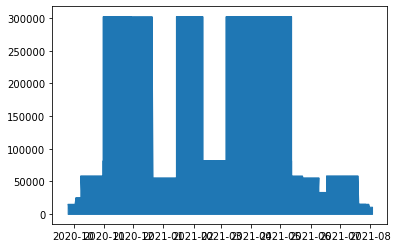

In [178]:
fig, ag = plt.subplots()
ag.fill_between(LaAraucanía["fecha"], LaAraucanía["Poblacion"], color = 'tab:blue')
plt.show()

In [179]:
LosLagos = NewData1[(NewData1.codigo_region==10) & (NewData1.Fase==1)]
LosLagos

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
723,10,Los Lagos,10101,Puerto Montt,Total,10101.0,269398.0,2020-07-29,1,2020-07-29
1109,10,Los Lagos,10101,Puerto Montt,Total,10101.0,269398.0,2020-07-30,1,2020-07-30
1495,10,Los Lagos,10101,Puerto Montt,Total,10101.0,269398.0,2020-07-31,1,2020-07-31
1881,10,Los Lagos,10101,Puerto Montt,Total,10101.0,269398.0,2020-08-01,1,2020-08-01
2267,10,Los Lagos,10101,Puerto Montt,Total,10101.0,269398.0,2020-08-02,1,2020-08-02
...,...,...,...,...,...,...,...,...,...,...
138539,10,Los Lagos,10305,Río Negro,Urbana,10305.0,14275.0,2021-07-21,1,2021-07-21
138924,10,Los Lagos,10305,Río Negro,Rural,10305.0,14275.0,2021-07-22,1,2021-07-22
138925,10,Los Lagos,10305,Río Negro,Urbana,10305.0,14275.0,2021-07-22,1,2021-07-22
139310,10,Los Lagos,10305,Río Negro,Rural,10305.0,14275.0,2021-07-23,1,2021-07-23


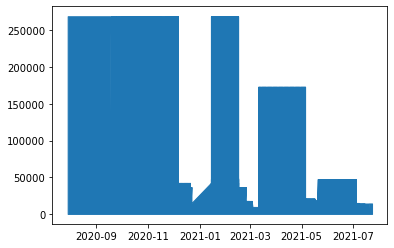

In [180]:
fig, ag = plt.subplots()
ag.fill_between(LosLagos["fecha"], LosLagos["Poblacion"], color = 'tab:blue')
plt.show()

In [181]:
Aysén = NewData1[(NewData1.codigo_region==11) & (NewData1.Fase==1)]
Aysén

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
23140,11,Aysén,11101,Coyhaique,Rural,11101.0,61210.0,2020-09-25,1,2020-09-25
23141,11,Aysén,11101,Coyhaique,Urbana,11101.0,61210.0,2020-09-25,1,2020-09-25
23526,11,Aysén,11101,Coyhaique,Rural,11101.0,61210.0,2020-09-26,1,2020-09-26
23527,11,Aysén,11101,Coyhaique,Urbana,11101.0,61210.0,2020-09-26,1,2020-09-26
23912,11,Aysén,11101,Coyhaique,Rural,11101.0,61210.0,2020-09-27,1,2020-09-27
...,...,...,...,...,...,...,...,...,...,...
133139,11,Aysén,11201,Aysén,Puerto Chacabuco,11201.0,NaN,2021-07-07,1,2021-07-07
133141,11,Aysén,11201,Aysén,Rural,11201.0,NaN,2021-07-07,1,2021-07-07
133145,11,Aysén,11202,Cisnes,Puerto Cisnes,11202.0,5828.0,2021-07-07,1,2021-07-07
133150,11,Aysén,11101,Coyhaique,Rural,11101.0,61210.0,2021-07-07,1,2021-07-07


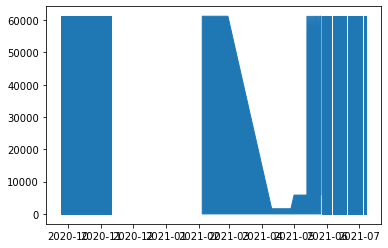

In [182]:
fig, ag = plt.subplots()
ag.fill_between(Aysén["fecha"], Aysén["Poblacion"], color = 'tab:blue')
plt.show()

In [183]:
Magallanes = NewData1[(NewData1.codigo_region==12) & (NewData1.Fase==1)]
Magallanes

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
9645,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2020-08-21,1,2020-08-21
10031,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2020-08-22,1,2020-08-22
10417,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2020-08-23,1,2020-08-23
10803,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2020-08-24,1,2020-08-24
11189,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2020-08-25,1,2020-08-25
...,...,...,...,...,...,...,...,...,...,...
124285,12,Magallanes,12301,Porvenir,Total,12301.0,7323.0,2021-06-14,1,2021-06-14
124670,12,Magallanes,12401,Natales,Total,12401.0,23782.0,2021-06-15,1,2021-06-15
124671,12,Magallanes,12301,Porvenir,Total,12301.0,7323.0,2021-06-15,1,2021-06-15
125056,12,Magallanes,12401,Natales,Total,12401.0,23782.0,2021-06-16,1,2021-06-16


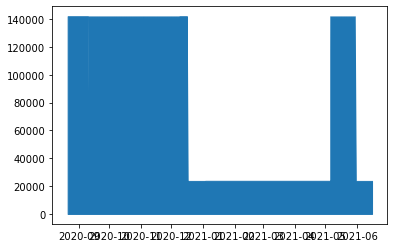

In [184]:
fig, ag = plt.subplots()
ag.fill_between(Magallanes["fecha"], Magallanes["Poblacion"], color = 'tab:blue')
plt.show()

In [185]:
Metropolitana = NewData1[(NewData1.codigo_region==13) & (NewData1.Fase==1)]
Metropolitana

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
88,13,Metropolitana,13402,Buin,Total,13402.0,109641.0,2020-07-28,1,2020-07-28
89,13,Metropolitana,13403,Calera de Tango,Total,13403.0,28525.0,2020-07-28,1,2020-07-28
90,13,Metropolitana,13102,Cerrillos,Total,13102.0,88956.0,2020-07-28,1,2020-07-28
91,13,Metropolitana,13103,Cerro Navia,Total,13103.0,142465.0,2020-07-28,1,2020-07-28
93,13,Metropolitana,13104,Conchalí,Total,13104.0,139195.0,2020-07-28,1,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
132512,13,Metropolitana,13504,María Pinto,Total,13504.0,14926.0,2021-07-06,1,2021-07-06
132872,13,Metropolitana,13402,Buin,Total,13402.0,109641.0,2021-07-07,1,2021-07-07
132878,13,Metropolitana,13503,Curacaví,Rural,13503.0,36430.0,2021-07-07,1,2021-07-07
132879,13,Metropolitana,13503,Curacaví,Urbana,13503.0,36430.0,2021-07-07,1,2021-07-07


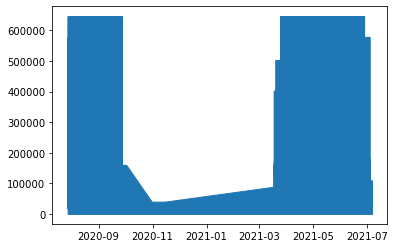

In [186]:
fig, ag = plt.subplots()
ag.fill_between(Metropolitana["fecha"], Metropolitana["Poblacion"], color = 'tab:blue')
plt.show()

In [187]:
LosRíos = NewData1[(NewData1.codigo_region==14) & (NewData1.Fase==1)]
LosRíos

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
36975,14,Los Ríos,14201,La Unión,Total,14201.0,39538.0,2020-10-31,1,2020-10-31
36976,14,Los Ríos,14203,Lago Ranco,Total,14203.0,10292.0,2020-10-31,1,2020-10-31
37361,14,Los Ríos,14201,La Unión,Total,14201.0,39538.0,2020-11-01,1,2020-11-01
37362,14,Los Ríos,14203,Lago Ranco,Total,14203.0,10292.0,2020-11-01,1,2020-11-01
37747,14,Los Ríos,14201,La Unión,Total,14201.0,39538.0,2020-11-02,1,2020-11-02
...,...,...,...,...,...,...,...,...,...,...
148151,14,Los Ríos,14108,Panguipulli,Urbana,14108.0,35991.0,2021-08-15,1,2021-08-15
148536,14,Los Ríos,14108,Panguipulli,Rural,14108.0,35991.0,2021-08-16,1,2021-08-16
148537,14,Los Ríos,14108,Panguipulli,Urbana,14108.0,35991.0,2021-08-16,1,2021-08-16
148922,14,Los Ríos,14108,Panguipulli,Rural,14108.0,35991.0,2021-08-17,1,2021-08-17


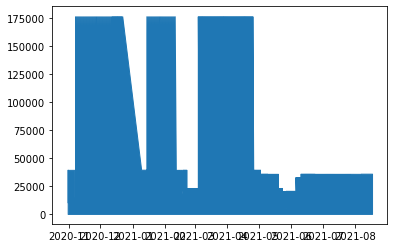

In [188]:
fig, ag = plt.subplots()
ag.fill_between(LosRíos["fecha"], LosRíos["Poblacion"], color = 'tab:blue')
plt.show()

In [189]:
Ñuble = NewData1[(NewData1.codigo_region==16) & (NewData1.Fase==1)]
Ñuble	

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
14107,16,Ñuble,16101,Chillán,Urbana,16101.0,198624.0,2020-09-02,1,2020-09-02
14109,16,Ñuble,16103,Chillán Viejo,Urbana,16103.0,33827.0,2020-09-02,1,2020-09-02
14493,16,Ñuble,16101,Chillán,Urbana,16101.0,198624.0,2020-09-03,1,2020-09-03
14495,16,Ñuble,16103,Chillán Viejo,Urbana,16103.0,33827.0,2020-09-03,1,2020-09-03
14879,16,Ñuble,16101,Chillán,Urbana,16101.0,198624.0,2020-09-04,1,2020-09-04
...,...,...,...,...,...,...,...,...,...,...
129528,16,Ñuble,16204,Ninhue,Total,16204.0,5414.0,2021-06-28,1,2021-06-28
129912,16,Ñuble,16302,Coihueco,Total,16302.0,28375.0,2021-06-29,1,2021-06-29
129914,16,Ñuble,16204,Ninhue,Total,16204.0,5414.0,2021-06-29,1,2021-06-29
130298,16,Ñuble,16302,Coihueco,Total,16302.0,28375.0,2021-06-30,1,2021-06-30


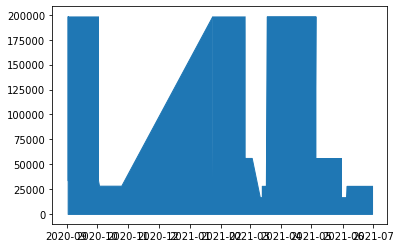

In [190]:
fig, ag = plt.subplots()
ag.fill_between(Ñuble["fecha"], Ñuble["Poblacion"], color = 'tab:blue')
plt.show()

In [191]:
CasoNacional = NewData1[(NewData1.Fase==1)]
CasoNacional

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,id_comuna,Poblacion,Fecha,Fase,fecha
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1,2020-07-28
5,1,Tarapacá,1107,Alto Hospicio,Total,1107.0,129999.0,2020-07-28,1,2020-07-28
9,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2020-07-28,1,2020-07-28
12,1,Tarapacá,1401,Pozo Almonte,Urbana,1401.0,17395.0,2020-07-28,1,2020-07-28
14,2,Antofagasta,2101,Antofagasta,Urbana,2101.0,425725.0,2020-07-28,1,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
148151,14,Los Ríos,14108,Panguipulli,Urbana,14108.0,35991.0,2021-08-15,1,2021-08-15
148536,14,Los Ríos,14108,Panguipulli,Rural,14108.0,35991.0,2021-08-16,1,2021-08-16
148537,14,Los Ríos,14108,Panguipulli,Urbana,14108.0,35991.0,2021-08-16,1,2021-08-16
148922,14,Los Ríos,14108,Panguipulli,Rural,14108.0,35991.0,2021-08-17,1,2021-08-17


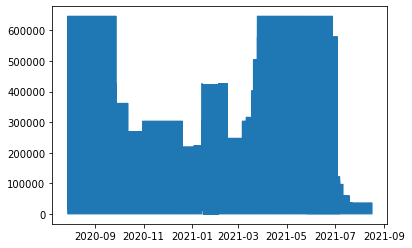

In [192]:
fig, ag = plt.subplots()
ag.fill_between(CasoNacional["fecha"], CasoNacional["Poblacion"], color = 'tab:blue')
plt.show()

In [193]:
#Creditos por ayuda para realizar la Tarea por Martin Marchant y Manuel Muñoz. 